# Mall Customer Segmentation

## Aim :
### To classify / cluster Mall Customers based on numerical and categorical features.
### It is an Unsupervised Learning problem statement.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

### First i will explore my dataset.

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
df.shape

(200, 5)

#### There is 200 rows and 5 columns in our dataset.

In [7]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

#### Overall
* Customer Count: The dataset has 200 customers.
* Age Range: Customers are between 18 and 70 years old.
* Annual Income Range: Annual income ranges from 15,000 to 137,000.
* Spending Score Range: Spending scores (on a scale of 1 to 100) range from 1 to 99, representing their spending habits or loyalty.
#### Age:
* Mean age is ~38.85 years, indicating that most customers are middle-aged.
* 50% of customers are younger than 36 years, and 75% are younger than 49 years.
#### Annual Income
* Mean income is 60.56k, suggesting a customer base with moderate annual earnings.
* The standard deviation of 26.26k shows significant variability in income levels.
#### Spending Score:
* The mean spending score is 50.2, suggesting an average level of spending/engagement.
* The distribution is fairly spread, with a standard deviation of 25.82.
#### Quartile Analysis:
* 25% of customers are younger than 28.75 years, earn less than 41.5k, and have a spending score below 34.75.
* 50% of customers are younger than 36 years, earn less than 61.5k, and have a spending score below 50.
* 75% of customers are younger than 49 years, earn less than 78k, and have a spending score below 73.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* Total Entries: 200 rows.
* Columns: 5 columns:
* CustomerID (int64) - Unique identifier for each customer.
* Gender (object) - Gender of the customer (categorical data).
* Age (int64) - Age of the customer.
* Annual Income (k$) (int64) - Annual income of the customer in thousands of dollars.
* Spending Score (1-100) (int64) - Customer's spending score on a scale of 1 to 100.
* Data Completeness: No missing values (all columns have 200 non-null entries).
* Memory Usage: ~7.9 KB.
#### This dataset is ready for analysis, with both numerical and categorical data suitable for statistical or machine learning tasks.

# Univariate Variable Analysis¶


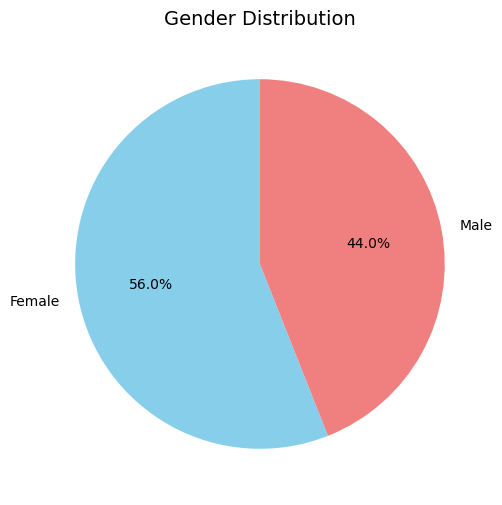

In [12]:
# Gender distribution
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution", fontsize=14)
plt.show()


#### The pie chart represents the gender distribution of a dataset. Here's an analysis:

* Female: Accounts for 56% of the dataset (majority group).
* Male: Accounts for 44% of the dataset.
  
#### Insights:
* The dataset is slightly skewed towards females, indicating that there are more female customers or subjects than male ones.

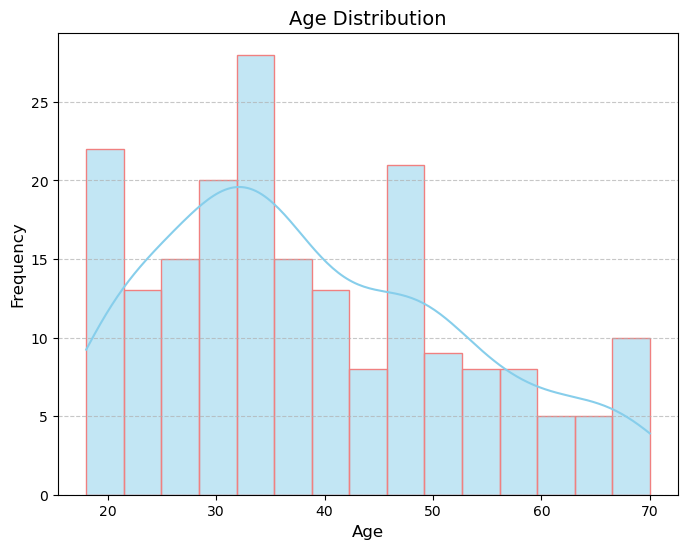

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=15, color='skyblue', edgecolor='lightcoral')
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### The histogram visualizes the age distribution in the dataset. Here's an analysis:

#### Age Range:

* The age values span from approximately 18 to 70 years, with most values concentrated in the middle ranges.
  
#### Frequency Distribution:
* The histogram shows a multimodal distribution, with peaks around 20–30 years and 35–40 years.
* There is a steady decline in the frequency of older ages, particularly beyond 50.
  
#### Kernel Density Estimate (KDE):
* The smooth KDE curve overlays the histogram, providing a continuous representation of the age density.
* It highlights a pronounced mode (peak) around the mid-30s, indicating that the dataset has more individuals in this age group.
  
#### Bin Analysis:
* The bars represent the frequency of individuals falling into specific age intervals (bins).
* The bin widths ensure a balance between granularity and clarity.
  
#### Insights:
* The dataset primarily consists of younger to middle-aged individuals, with fewer older individuals (50+).
* The population seems to have a slight skew towards younger ages.
* This distribution might affect any analysis or modeling where age is a feature, as younger individuals dominate the dataset.

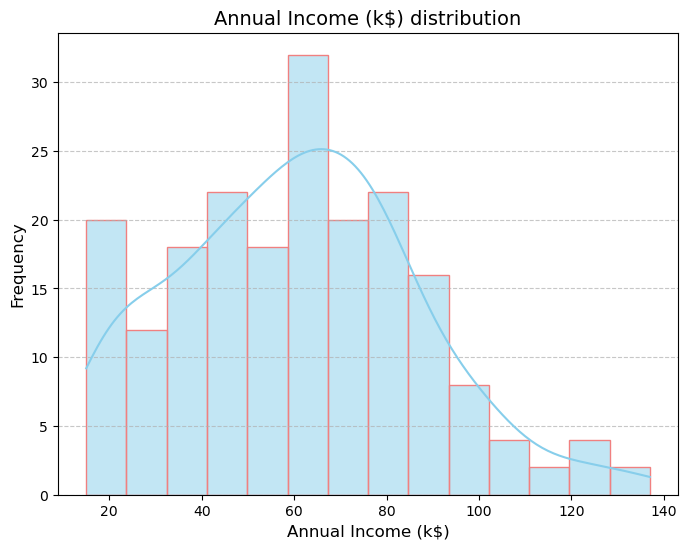

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=14, color='skyblue', edgecolor='lightcoral')
plt.title("Annual Income (k$) distribution", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Income Spread: The spread of incomes ranges from 15000 k to 137000k.
* Most Common Income Range: The majority of individuals earn between 50k and 70k annually.
* Peak Frequency: The highest frequency is around 35 individuals earning between 50k and 70k.
* Right-Skewed Distribution: The distribution is right-skewed, meaning there are fewer individuals earning above 100 k$.
* Lowest Income Group: The smallest group falls in the above 100 k range.

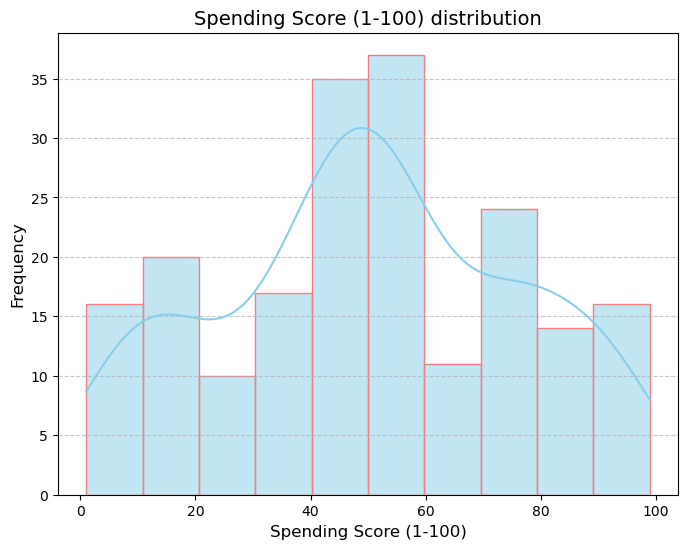

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=10, color='skyblue', edgecolor='lightcoral')
plt.title("Spending Score (1-100) distribution", fontsize=14)
plt.xlabel("Spending Score (1-100)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Distribution Range:

* Spending scores range from 0 to 100.
* Frequencies for each bin are shown on the y-axis.

#### Distribution Shape:

* The distribution appears bimodal, with noticeable peaks around 40–60 and 70–80.
* There are dips in frequency near scores of 20 and 90, creating gaps between peaks.

#### Frequency Observations:

* The highest frequency occurs in the 40–60 range.
* Low frequencies are observed near the extremes (0–20 and 90–100).

#### Kernel Density Estimation (KDE):

* The blue KDE curve highlights two distinct customer groups based on spending scores.
* The curve smoothens the histogram to reveal the underlying trends.

#### Behavioral Insight:

* The bimodal pattern suggests the presence of two customer segments (e.g., moderate spenders vs. high spenders).
* Intermediate scores (20–40) show a lower frequency, indicating fewer customers in this range.

#### Variability:

* Scores are fairly spread out, with no significant skewness or clustering at one end.

# Bivariate Analysis

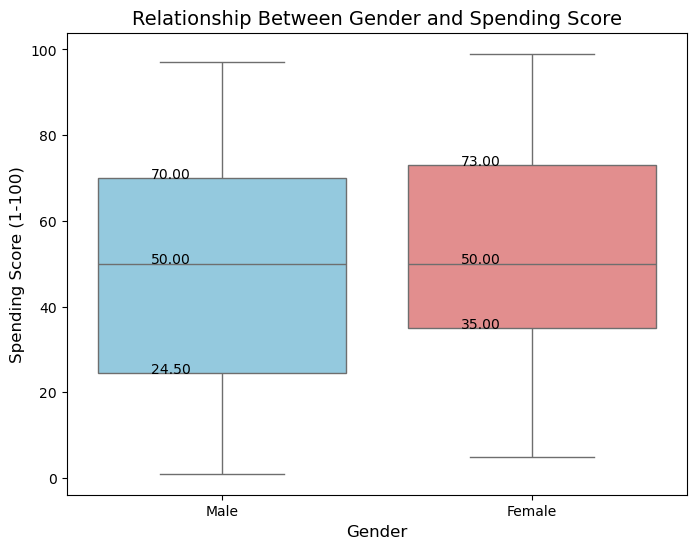

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, hue="Gender", palette=["skyblue", "lightcoral"], legend=False)

# Annotate quantiles
for i, gender in enumerate(df["Gender"].unique()):
    # Get the quantiles
    quantiles = df[df["Gender"] == gender]["Spending Score (1-100)"].quantile([0.25, 0.5, 0.75])
    
    # Add text annotations for the quantiles
    ax.text(i - 0.1, quantiles[0.25], f'{quantiles[0.25]:.2f}', color="black", ha="right", fontsize=10)
    ax.text(i - 0.1, quantiles[0.5], f'{quantiles[0.5]:.2f}', color="black", ha="right", fontsize=10)
    ax.text(i - 0.1, quantiles[0.75], f'{quantiles[0.75]:.2f}', color="black", ha="right", fontsize=10)

# Add labels and a title
plt.title("Relationship Between Gender and Spending Score", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Show the plot
plt.show()

* Median Spending Score: Both genders have the same median spending score of 50.00.

##### Male Spending Score Distribution:

* Interquartile Range (IQR): 24.50 to 70.00, indicating a slightly wider range of middle 50% scores compared to females.

* Outliers: No significant outliers, indicating a consistent spending pattern.

##### Female Spending Score Distribution:

* Interquartile Range (IQR): 35.00 to 73.00, showing a more concentrated distribution within the middle 50% compared to males.

* Outliers: No significant outliers, indicating a consistent spending pattern.

##### Score Range: Both genders have a similar overall range, with minimum and maximum scores around 0 and 100, respectively.

##### Distribution Shape: Both box plots indicate a symmetric distribution, with similar upper and lower quartiles.

#### Overall, the plot suggests that spending scores are relatively consistent across genders, with slight variations in the interquartile ranges.

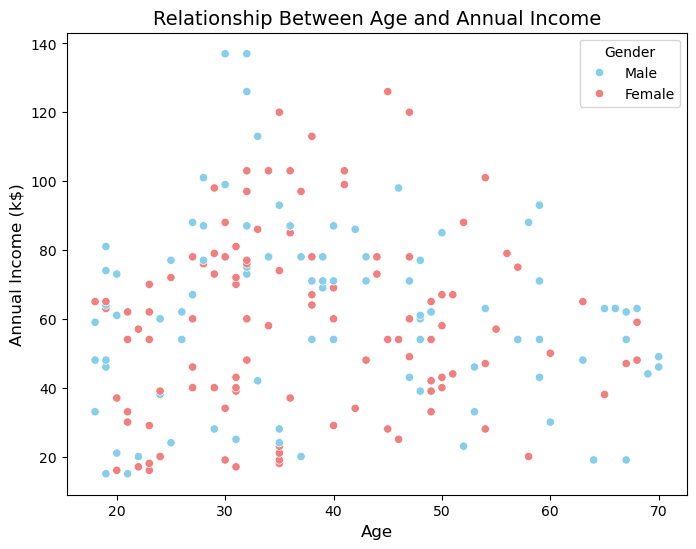

In [23]:
# Create a scatter plot to visualize the relationship between Age and Annual Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Annual Income (k$)", data=df, hue="Gender", palette=["skyblue", "lightcoral"])

# Add labels and a title
plt.title("Relationship Between Age and Annual Income", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Annual Income (k$)", fontsize=12)

# Show the plot
plt.show()

* The scatter plot reveals a diverse distribution of annual incomes for both males and females, with no distinct pattern linking age and income. This suggests that factors other than age, such as occupation, education, and experience, might play a more significant role in determining income levels.

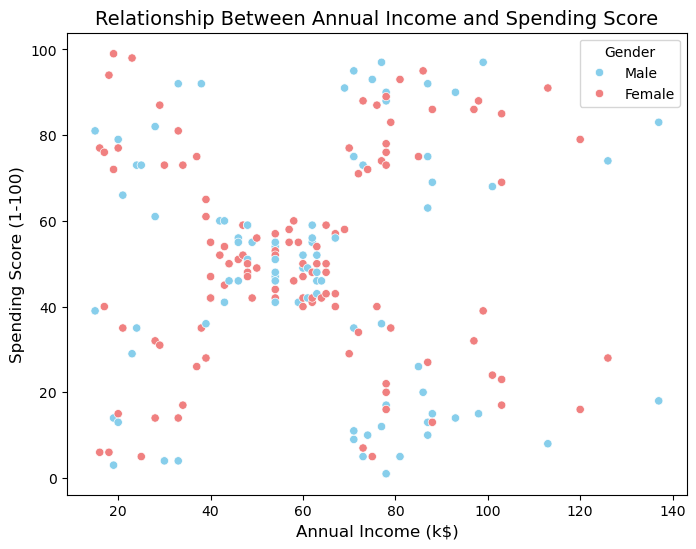

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue="Gender", palette=["skyblue", "lightcoral"])

# Add labels and a title
plt.title("Relationship Between Annual Income and Spending Score", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Show the plot
plt.show()

#### The scatter plot reveals five groups based on annual income and spending scores.

##### Low Income, Low Spending:

* Annual Income: 0-40 k$
* Spending Score: 0-40

##### Low Income, High Spending:

* Annual Income: 0-40 k$
* Spending Score: 60-100

##### Middle Income, Middle Spending:

* Annual Income: 40-80 k$
* Spending Score: 40-60

##### High Income, Low Spending:

* Annual Income: 80-140 k$
* Spending Score: 0-40

##### High Income, High Spending:

* Annual Income: 80-140 k$
* Spending Score: 60-100

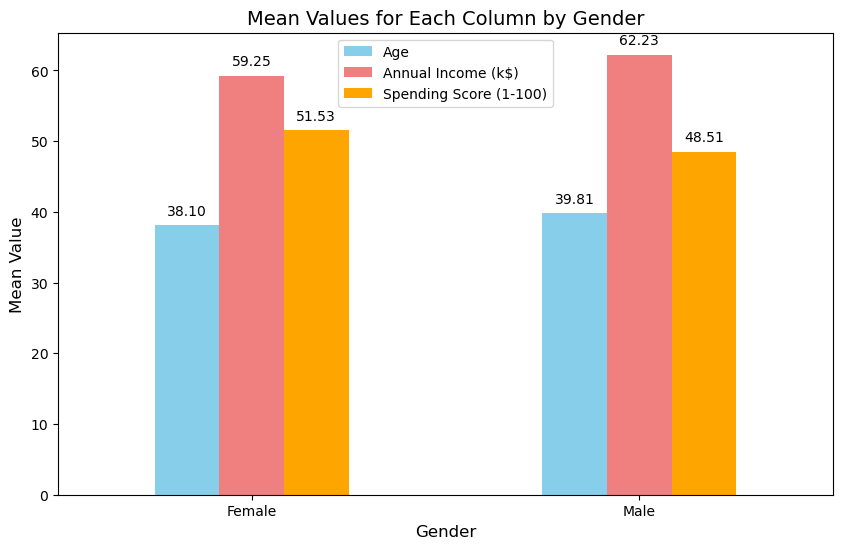

In [27]:
mean_values = df.groupby("Gender")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

# Create a bar plot for the mean values
ax = mean_values.plot(kind='bar', figsize=(10, 6), color=["skyblue", "lightcoral","orange"], rot=0)

# Add labels and a title
plt.title("Mean Values for Each Column by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

#### males:
* Mean Age: 38.10 years
* Mean Annual Income: 59.25 k\$
* Mean Spending Score: 51.53
#### Males:
* Mean Age: 39.81 years
* Mean Annual Income: 62.23 k\$
* Mean Spending Score: 48.51

#### Key Observations:
* Age: On average, males are slightly older than females.
* Annual Income: Males have a higher mean annual income compared to females.
* Spending Score: Females have a higher mean spending score than males.

In [29]:
df1=df.copy()

In [30]:
df1['Gender'] = df1['Gender'].replace({'Male': 1, 'Female': 0})


/var/folders/ny/3rcm1ghd78x94ld4h9hqkjm00000gn/T/ipykernel_44462/358120320.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'] = df1['Gender'].replace({'Male': 1, 'Female': 0})


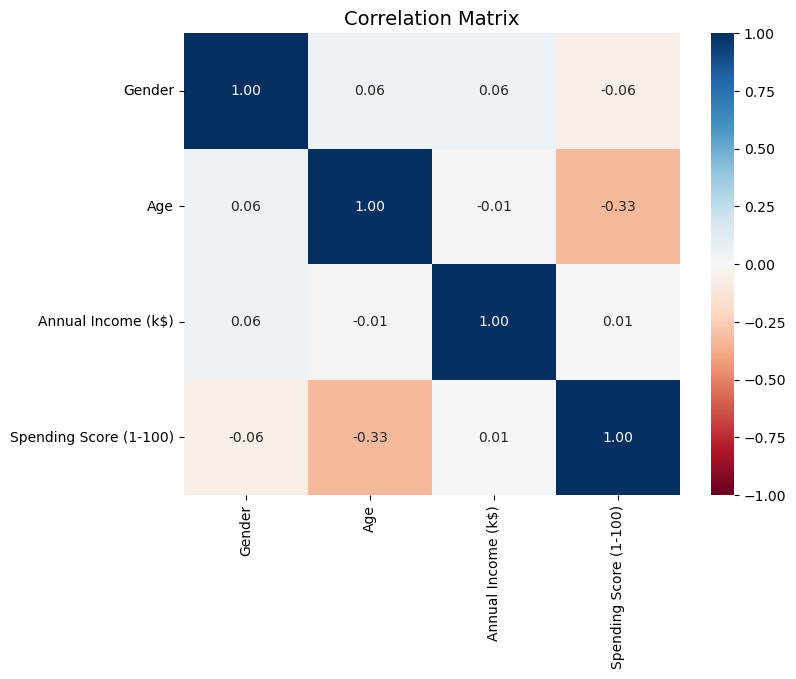

In [31]:
correlation_matrix = df1[["Gender","Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", vmin=-1, vmax=1)

# Add a title
plt.title("Correlation Matrix", fontsize=14)

# Show the plot
plt.show()

* Gender and Age: 0.06
* Gender and Annual Income (k\$): 0.06
* Gender and Spending Score (1-100): -0.06
* Age and Annual Income (k\$): -0.01
* Age and Spending Score (1-100): -0.33
* Annual Income (k\$) and Spending Score (1-100): 0.01

##### Key Insights:
* Age and Spending Score: Age has a moderate negative correlation with Spending Score (-0.33), suggesting that older individuals tend to have lower spending scores.
* Other Correlations: The remaining correlations are relatively weak, indicating little to no linear relationship between those pairs of variables.

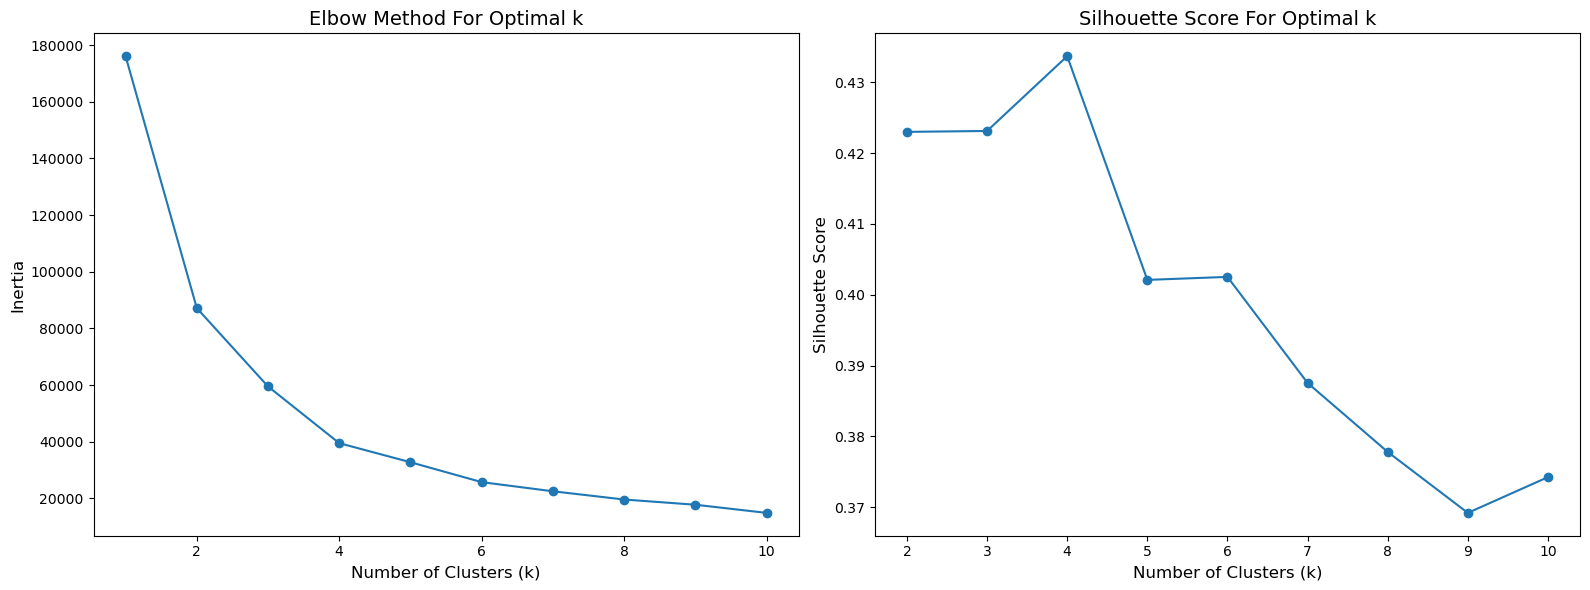

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = df[["Age", "Annual Income (k$)"]]


# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Silhouette Method to evaluate clustering quality
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Elbow Method Plot
axes[0].plot(range(1, 11), inertia, marker='o')
axes[0].set_title("Elbow Method For Optimal k", fontsize=14)
axes[0].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[0].set_ylabel("Inertia", fontsize=12)

# Silhouette Method Plot
axes[1].plot(range(2, 11), silhouette_scores, marker='o')
axes[1].set_title("Silhouette Score For Optimal k", fontsize=14)
axes[1].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[1].set_ylabel("Silhouette Score", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## K=4

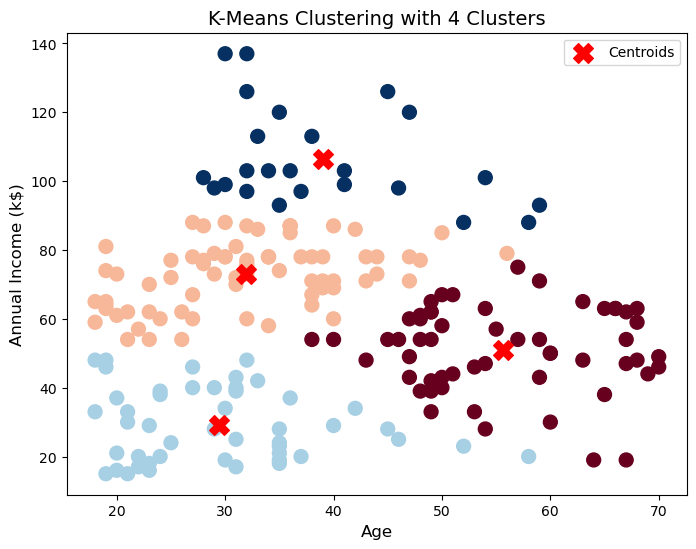

In [34]:
# Select the features for clustering
X = df[["Age", "Annual Income (k$)"]]

# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='RdBu', s=100)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Centroids")

# Add labels and a title
plt.title("K-Means Clustering with 4 Clusters", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Annual Income (k$)", fontsize=12)
plt.legend()

# Show the plot
plt.show()

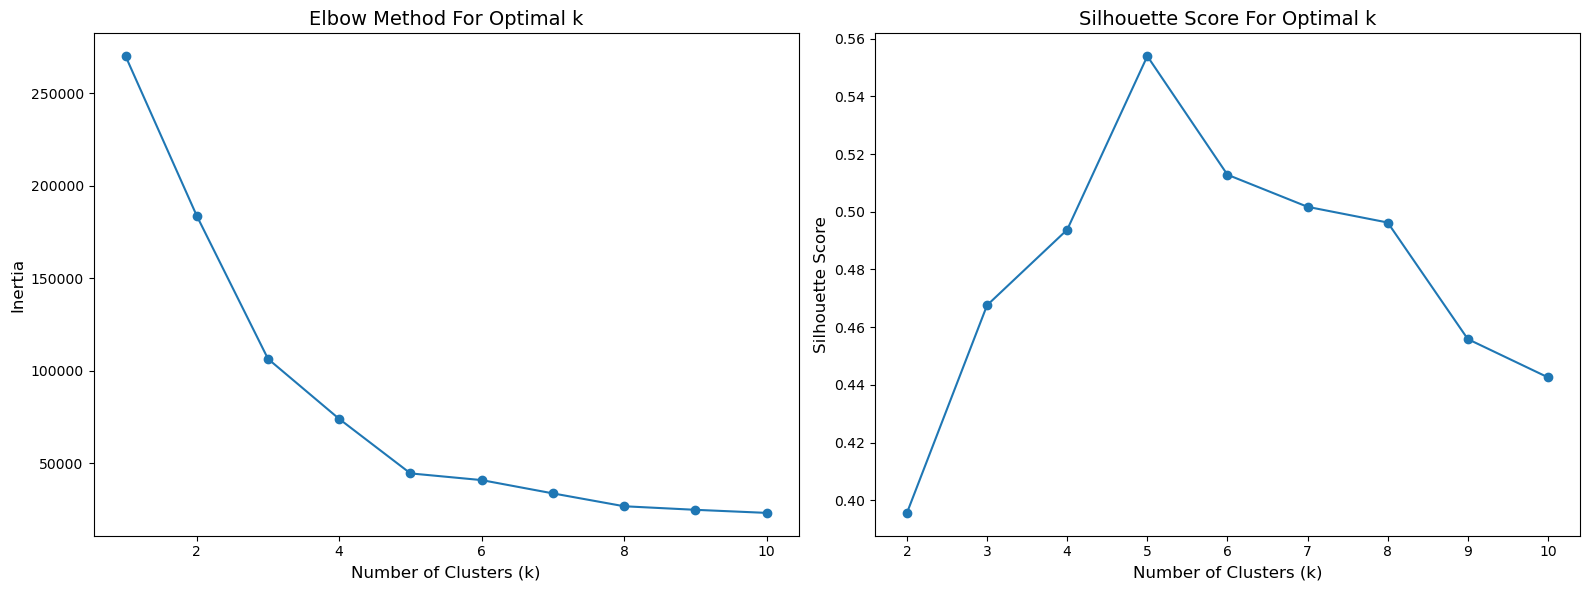

In [35]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]


# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Silhouette Method to evaluate clustering quality
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Elbow Method Plot
axes[0].plot(range(1, 11), inertia, marker='o')
axes[0].set_title("Elbow Method For Optimal k", fontsize=14)
axes[0].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[0].set_ylabel("Inertia", fontsize=12)

# Silhouette Method Plot
axes[1].plot(range(2, 11), silhouette_scores, marker='o')
axes[1].set_title("Silhouette Score For Optimal k", fontsize=14)
axes[1].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[1].set_ylabel("Silhouette Score", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## K=5

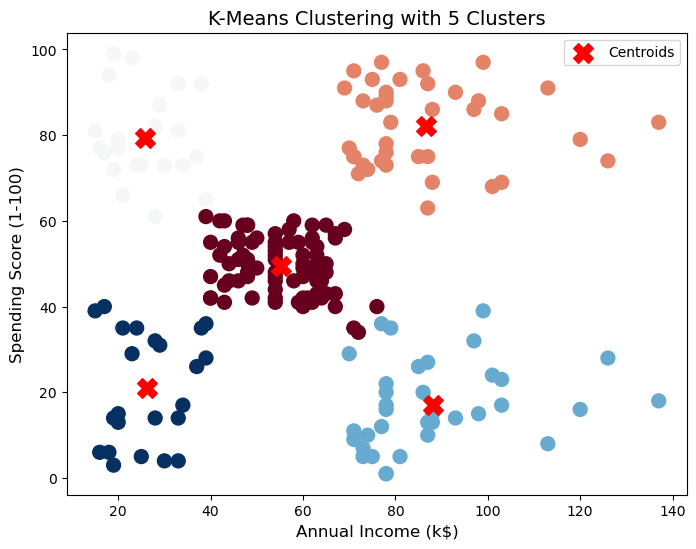

In [36]:
# Select the features for clustering
X = df[["Annual Income (k$)","Spending Score (1-100)"]]

# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df['Cluster'], cmap='RdBu', s=100)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Centroids")

# Add labels and a title
plt.title("K-Means Clustering with 5 Clusters", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend()

# Show the plot
plt.show()

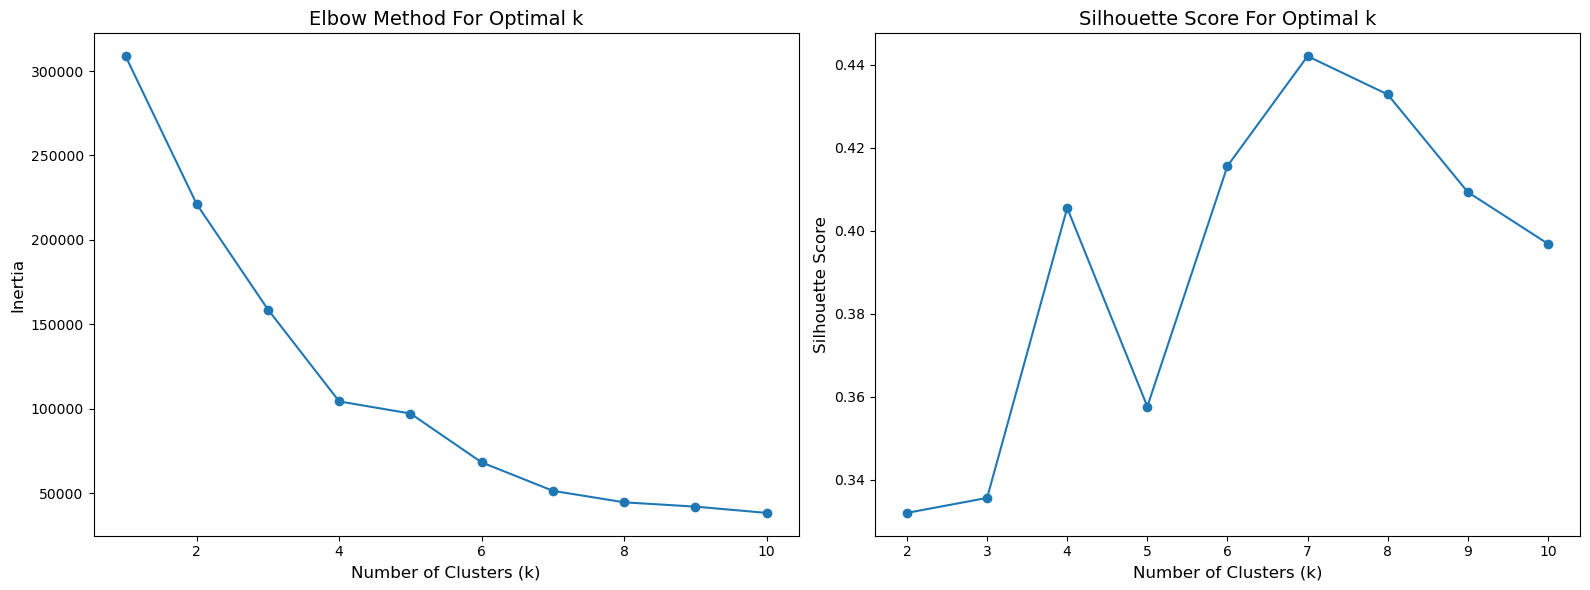

In [37]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Silhouette Method to evaluate clustering quality
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Elbow Method Plot
axes[0].plot(range(1, 11), inertia, marker='o')
axes[0].set_title("Elbow Method For Optimal k", fontsize=14)
axes[0].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[0].set_ylabel("Inertia", fontsize=12)

# Silhouette Method Plot
axes[1].plot(range(2, 11), silhouette_scores, marker='o')
axes[1].set_title("Silhouette Score For Optimal k", fontsize=14)
axes[1].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[1].set_ylabel("Silhouette Score", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## K=7

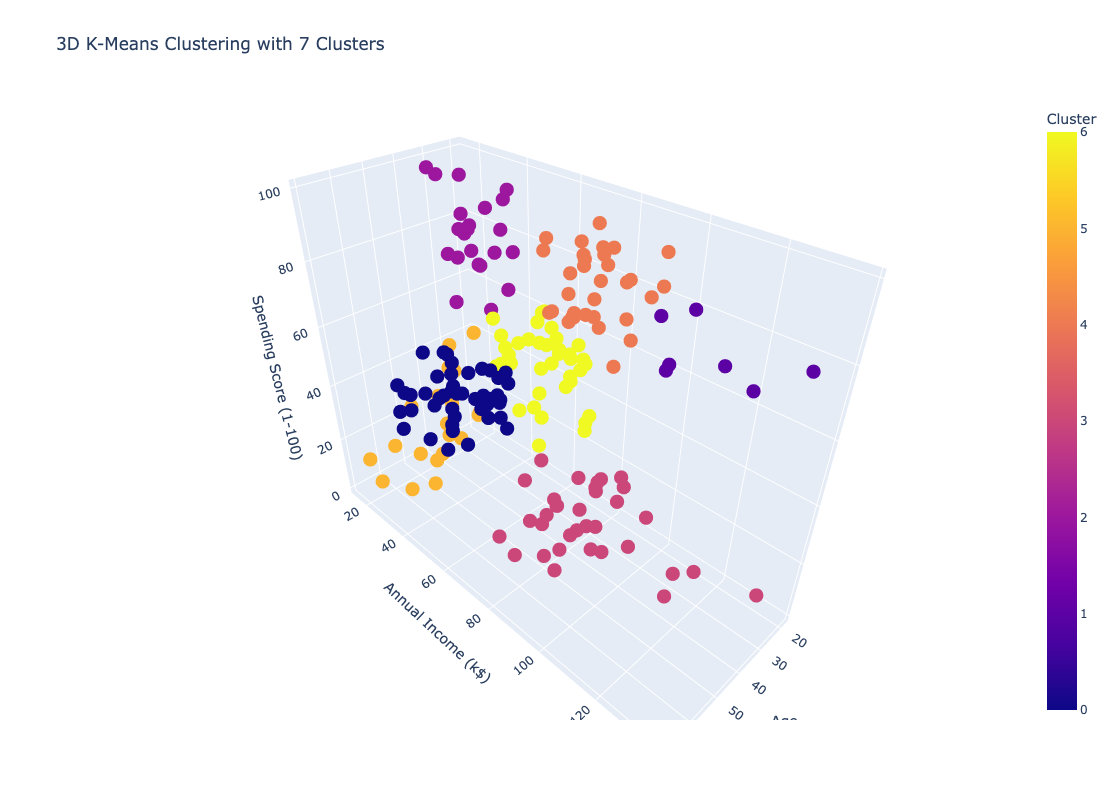

In [39]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Apply KMeans with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Create the interactive 3D scatter plot
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', 
                    color='Cluster', title='3D K-Means Clustering with 7 Clusters', 
                    labels={'Age': 'Age', 'Annual Income (k$)': 'Annual Income (k$)', 'Spending Score (1-100)': 'Spending Score (1-100)'})

# Update the layout to make the plot bigger
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Spending Score (1-100)',
    ),
    width=1200,  # Increase the width
    height=800,  # Increase the height
)

# Show the plot
fig.show()

## Let's summarize our groups of clusters:

In [40]:
# Group by cluster and calculate mean for each feature
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Access the centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Centroid_Age', 'Centroid_Annual Income (k$)', 'Centroid_Spending Score (1-100)'])

# Merge the cluster summary with the cluster counts
cluster_summary = cluster_summary.merge(cluster_counts, left_index=True, right_index=True)

# Add the centroids to the cluster summary
final_summary = cluster_summary.merge(centroids, left_index=True, right_index=True)

# Display the final table
final_summary

Age  Annual Income (k$)  Spending Score (1-100)  count  \
Cluster                                                                 
0        56.340909           53.704545               49.386364     44   
1        33.000000          114.714286               78.428571      7   
2        25.521739           26.304348               78.565217     23   
3        41.647059           88.735294               16.764706     34   
4        32.625000           80.375000               82.937500     32   
5        44.318182           25.772727               20.272727     22   
6        27.315789           57.500000               48.447368     38   

         Centroid_Age  Centroid_Annual Income (k$)  \
Cluster                                              
0           56.340909                    53.704545   
1           33.000000                   114.714286   
2           25.521739                    26.304348   
3           41.647059                    88.735294   
4           32.625000                    80.375000   
5           44.318182                    25.772727   
6           27.315789                    57.500000   

         Centroid_Spending Score (1-100)  
Cluster                                   
0                              49.386364  
1                              78.428571  
2                              78.565217  
3                              16.764706  
4                              82.937500  
5                              20.272727  
6                              48.447368

## Here i will predict the cluster label for a new data point:

In [41]:
new_data = pd.DataFrame({
    "Age": [25],
    "Annual Income (k$)": [17],
    "Spending Score (1-100)": [60]
})

# Predict the cluster for the new data point
predicted_cluster = kmeans.predict(new_data)

# Output the predicted cluster label
print(f"The new customer belongs to cluster: {predicted_cluster[0]}")

The new customer belongs to cluster: 2


## As a company owner, we can leverage the insights from clustering to better understand customers and tailor our business strategies. Here are some ways to use the clusters for our business:

#### Targeted Marketing Campaigns
Segmented Marketing: The clusters represent different customer segments with unique behaviors. we can design personalized marketing campaigns targeting the specific needs or behaviors of each cluster. For instance:

* Cluster with high spending score: we can target these customers with premium offers, loyalty programs, or upsell high-value products.
* Cluster with low spending score: For this group, we might want to offer discounts or incentives to increase their engagement and spending.
* Customized Messaging: Tailor messaging to different segments. For example, customers in a high-income group with a high spending score might respond better to exclusive, luxury-oriented messages.

#### Product Recommendations
Cluster-based Product offering: Based on the characteristics of each cluster (e.g., age, income, and spending score), we can recommend products or services that resonate with each group. For instance:

* High-income, high-spending clusters: These customers might be interested in premium products.
* Young, lower-income clusters: Offer more affordable or entry-level products that match their budget.
* Dynamic Pricing: we can use the clusters to implement dynamic pricing models. High-income clusters could be offered higher-priced products, while lower-income clusters could get discounts.

#### Customer Retention and Loyalty
* Identify High-Value Customers: Clusters with high spending scores can be our most loyal and profitable customers. we can build loyalty programs or offer exclusive benefits to encourage repeat business.
* Targeted Retention Campaigns: For clusters with lower spending scores or those at risk of churning, consider retention strategies such as loyalty programs, special offers, or personalized communication.
  
#### Store Layout and Product Placement (For Physical Stores)
* Segmented Store Layout: If your business has physical stores, we can design store layouts or displays based on customer preferences identified by the clusters. For instance, customers in high-income groups might prefer a premium section of your store.
* Personalized In-Store Experience: Offer personalized product recommendations or discounts based on the cluster characteristics of the customer visiting your store.

#### Optimizing Inventory Management
* Stock Based on Preferences: If certain clusters prefer particular products (e.g., high-income groups prefer luxury items), We can stock the inventory accordingly.
* Demand Forecasting: By understanding the preferences and behaviors of each cluster, We can better predict demand for certain products and plan inventory levels more effectively.

#### Customer Service Customization
##### Customer Support Focus: Different clusters may have varying expectations for customer support. For example:

* High-value clusters may expect premium support (faster response times, dedicated support teams).
* Lower-spending clusters might need more basic or self-service support options.
##### Tailored Communication: For example, send email newsletters tailored to the different segments. A high-income group might appreciate a more sophisticated and professional tone, while a younger or budget-conscious group may prefer a more casual, fun tone.

#### Strategic Business Decisions
* New Market Exploration: By analyzing the clusters, We can identify underserved segments and focus on targeting them for future growth.
* Customer Acquisition: Focus our acquisition strategies on customer segments that are more likely to generate higher value, based on the characteristics of the clusters (e.g., targeting high-income customers).

#### Customer Segmentation for Surveys and Feedback
* Segmented Surveys: We can tailor surveys or feedback requests based on clusters to gain more relevant insights. For example, We can ask  high-income clusters about new premium products, while focusing on affordable products for lower-income clusters.

#### Improved Business Metrics
* Sales Analysis: By monitoring the behavior and performance of each cluster, We can gain insights into which clusters generate the most revenue, which are most loyal, and which need more attention.
* Lifetime Value (LTV) Estimation: Calculate the potential lifetime value of customers in each cluster to prioritize marketing and retention efforts.

#### Pricing Strategy
##### Cluster-Based Pricing: Use the income and spending score data to design pricing strategies that are in line with the customer’s willingness to pay. For example:
* Offer premium pricing for high-income customers with high spending scores.
* Provide discounts and promotions for younger or budget-conscious clusters.

## Example of implementation:
#### Let’s say this dataset is for a retail company that sells clothing and accessories online. After clustering the customers, We find the following:

##### Cluster 1: High-income, middle-aged, high-spending score. Likely professionals or older customers.
* Action: Send personalized emails offering premium products like luxury clothing. Create a VIP loyalty program.

##### Cluster 2: Young, low-income, low-spending score. Likely students or early-career individuals.
* Action: Provide discounts, affordable fashion options, and bundle offers to increase sales volume.

##### Cluster 3: Middle-income, older customers, moderate spending score.
* Action: Offer products that cater to family or everyday use and provide them with special deals for bulk purchases.

#### Conclusion:
Clusters help us understand our customers' distinct needs, allowing us to create tailored strategies across marketing, sales, customer service, and inventory management. By acting on the insights derived from these clusters, we can boost our business's performance, customer satisfaction, and retention.